In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display
from sklearn.preprocessing import MinMaxScaler

In [3]:
""" 3 a)"""
df = pd.read_csv('Hotel Reservations.csv')
print(len(df))         # => dataset has 36275 rows
display(df.head())     #automatically shows firt 5 rows


36275


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
""" 3 b)"""
df = pd.read_csv('Hotel Reservations.csv')
df.drop(columns='Booking_ID', inplace=True)
df = df[df['no_of_adults'] >= 1]
display(df.head())   


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
""" 3 c)"""
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})
display(df.head())   

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


In [12]:
""" 3 d)"""
canceled_percentage = df['booking_status'].mean() * 100
print(f"canceled were: {canceled_percentage} % \n")

busiest_month = df['arrival_month'].mode()[0]               #mode finds mostr frquent, take first entry with [0]
print(f"busies month is: {busiest_month} \n")

df['total_nights'] = df['no_of_week_nights'] + df['no_of_weekend_nights']
solo = df[df['no_of_adults'] == 1]['total_nights'].mean()
fams = df[(df['no_of_adults'] > 1) & (df['no_of_children'] == 0)]['total_nights'].mean() #familie means >1 adult, right?
print(f"Solo avg nights: {solo}, families avg nights: {fams} \n")

cancellation_by_segment = df.groupby('market_segment_type')['booking_status'].mean() * 100     #group first, then f e group, calc avg cancelation rate
print(cancellation_by_segment)

canceled were: 32.76787690945318 % 

busies month is: 10 

Solo avg nights: 2.5324236517218974, families avg nights: 3.1397832936294474 

market_segment_type
Aviation         29.600000
Complementary     0.000000
Corporate        10.907288
Offline          29.951553
Online           36.529463
Name: booking_status, dtype: float64


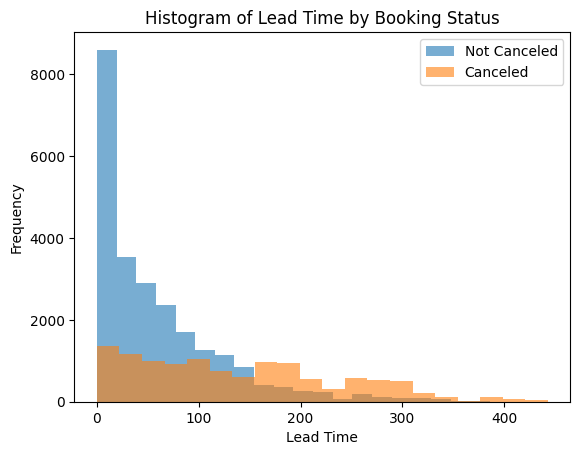

In [ ]:
""" 3 e)"""
plt.hist(df[df['booking_status'] == 0]['lead_time'], bins=20, alpha=0.6, label='Not Canceled')
plt.hist(df[df['booking_status'] == 1]['lead_time'], bins=20, alpha=0.6, label='Canceled')

plt.xlabel("Lead Time")
plt.ylabel("Frequency")
plt.title("Histogram of Lead Time by Booking Status")
plt.legend()
plt.show()

#the ones with shorter lead time(time between booking and arrival data) are less often canceled, because your plan are likely more certain then


In [8]:
""" 3 f)"""
print("before")
display(df.head())

categories = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categories, drop_first=True)
df_encoded = df_encoded.astype(int)
print("after")
pd.set_option('display.max_columns', None)
display(df_encoded.head())
#remove the first category, bc if all are zero we have the first category

before


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0,3
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0,5
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1,3
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1,2
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1,2


after


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,0,0,65,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106,1,0,5,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,0,0,100,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,0,0,94,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1


In [9]:
""" 3 g)"""
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)
display(df_scaled.head())

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.333333,0.0,0.142857,0.117647,0.0,0.505643,0.0,0.818182,0.033333,0.0,0.0,0.0,0.120370,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.333333,0.0,0.285714,0.176471,0.0,0.011287,1.0,0.909091,0.166667,0.0,0.0,0.0,0.196296,0.2,0.0,0.208333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.0,0.285714,0.058824,0.0,0.002257,1.0,0.090909,0.900000,0.0,0.0,0.0,0.111111,0.0,1.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.333333,0.0,0.000000,0.117647,0.0,0.476298,1.0,0.363636,0.633333,0.0,0.0,0.0,0.185185,0.0,1.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.333333,0.0,0.142857,0.058824,0.0,0.108352,1.0,0.272727,0.333333,0.0,0.0,0.0,0.174074,0.0,1.0,0.083333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


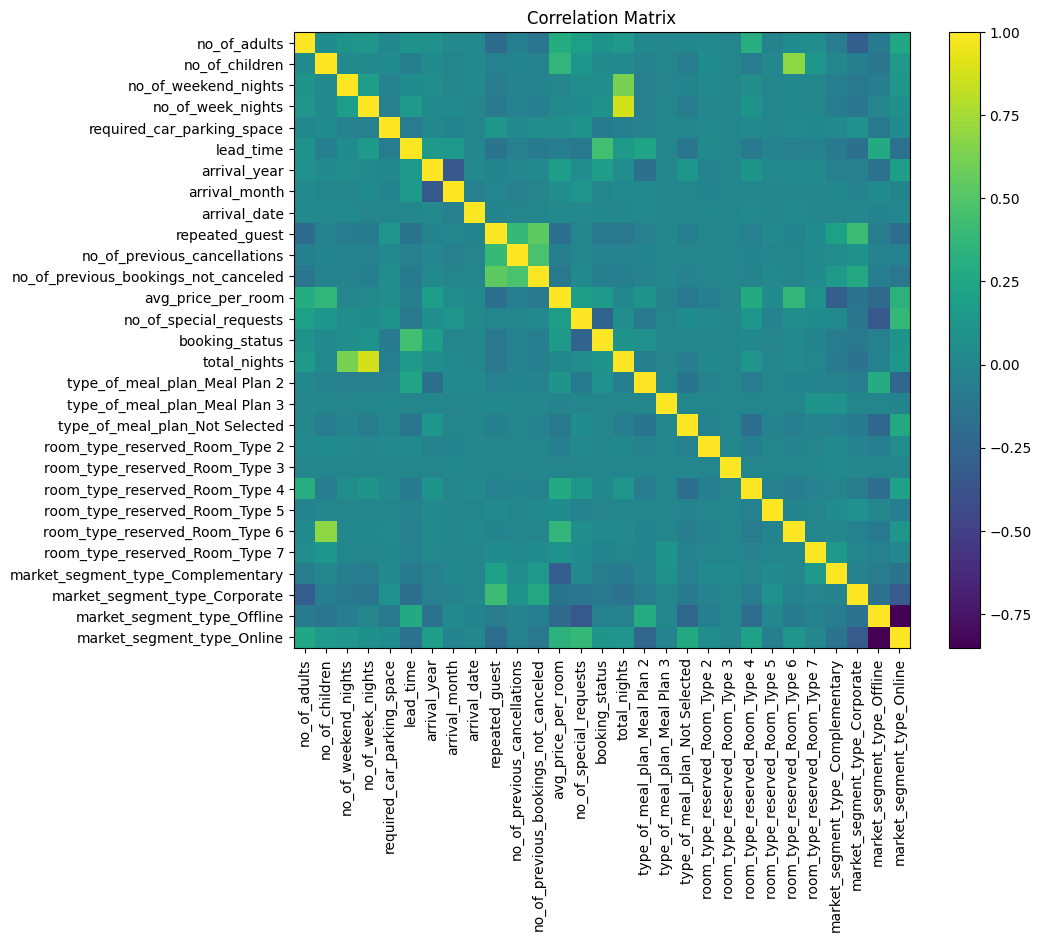

In [10]:
""" 3 h)"""
corr_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix)
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Matrix")
plt.show()


In [11]:
correlations = corr_matrix['booking_status'].sort_values(ascending=False)
print(correlations)

booking_status                          1.000000
lead_time                               0.438468
arrival_year                            0.179745
avg_price_per_room                      0.142324
market_segment_type_Online              0.106554
total_nights                            0.102997
no_of_week_nights                       0.092535
no_of_adults                            0.088952
type_of_meal_plan_Meal Plan 2           0.086679
no_of_weekend_nights                    0.061333
no_of_children                          0.035367
room_type_reserved_Room_Type 6          0.032973
room_type_reserved_Room_Type 4          0.013298
arrival_date                            0.010828
type_of_meal_plan_Not Selected          0.003042
room_type_reserved_Room_Type 2          0.000873
room_type_reserved_Room_Type 3         -0.001244
type_of_meal_plan_Meal Plan 3          -0.003200
room_type_reserved_Room_Type 5         -0.010251
arrival_month                          -0.011521
room_type_reserved_R